# Anexo 6

## 1. Instalaciones necesarias

In [ ]:
dataset_name="Dataset003_ToothFairy2"

In [ ]:
!pip install SimpleITK

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.7/52.7 MB 10.6 MB/s eta 0:00:00


In [ ]:
import os
import numpy as np
import SimpleITK as sitk

In [ ]:
# Montar Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 2. Transformacion de imagenes 3d .mha a 2d nii.gz

Este script procesa imágenes médicas en formato MHA (MetaImage) ubicadas en el directorio de entrada (image_dir) junto con sus correspondientes etiquetas en el directorio (label_dir). Cada imagen MHA se compone de múltiples slices, aproximadamente 275 slices en promedio. El script itera sobre cada imagen, luego itera sobre cada slice de la imagen y su etiqueta correspondiente. Para cada slice, se realiza la conversión y se guarda como un archivo nii.gz. Los archivos nii.gz resultantes se guardan en los directorios de salida especificados (output_image_dir para las imágenes y output_label_dir para las etiquetas).

In [ ]:
def convert_images_labels(image_dir, label_dir, output_image_dir, output_label_dir):
    # Obtener la lista de archivos de imágenes en el directorio de entrada
    image_files = sorted(os.listdir(image_dir))

    # Obtener la lista de archivos de etiquetas en el directorio de entrada
    label_files = sorted(os.listdir(label_dir))

    # Crear directorios de salida si no existen
    os.makedirs(output_image_dir, exist_ok=True)
    os.makedirs(output_label_dir, exist_ok=True)

    # Procesar cada par de imágenes y etiquetas
    for image_file, label_file in zip(image_files, label_files):
        # Leer la imagen
        image_path = os.path.join(image_dir, image_file)
        image = sitk.ReadImage(image_path)

        # Leer la etiqueta
        label_path = os.path.join(label_dir, label_file)
        label = sitk.ReadImage(label_path)

        # Obtener el nombre base (sin extensión) para el archivo de salida
        base_name = os.path.splitext(label_file)[0]

        # Iterar sobre cada slice y guardarlas con el nombre adecuado
        for idx, (image_slice, label_slice) in enumerate(zip(sitk.GetArrayFromImage(image), sitk.GetArrayFromImage(label))):
            # Guardar la imagen como archivo nii.gz en el directorio de salida de imágenes
            output_image_path = os.path.join(output_image_dir, f"{base_name}{idx:03d}_0000.nii.gz")
            sitk.WriteImage(sitk.GetImageFromArray(image_slice), output_image_path)

            # Guardar la etiqueta como archivo nii.gz en el directorio de salida de etiquetas
            output_label_path = os.path.join(output_label_dir, f"{base_name}{idx:03d}.nii.gz")
            sitk.WriteImage(sitk.GetImageFromArray(label_slice), output_label_path)

    print("Proceso completado.")
    # Obtener número de archivos en el directorio de salida de imágenes
    num_images = len(os.listdir(output_image_dir))

    # Obtener número de archivos en el directorio de salida de etiquetas
    num_labels = len(os.listdir(output_label_dir))

    print(f"Número de archivos en el directorio de salida de imágenes: {num_images}")
    print(f"Número de archivos en el directorio de salida de etiquetas: {num_labels}")

### 2.1 Para Train dataset

In [ ]:
# Directorios de entrada
image_dir = '/content/drive/MyDrive/saros/nnUNet/nnUNet_raw/Para_transformar_imagenes/imagenes'
label_dir = '/content/drive/MyDrive/saros/nnUNet/nnUNet_raw/Para_transformar_imagenes/labels'

# Directorios de salida
output_image_dir = '/content/drive/MyDrive/saros/nnUNet/nnUNet_raw/' + dataset_name + '/imagesTr'
output_label_dir = '/content/drive/MyDrive/saros/nnUNet/nnUNet_raw/' + dataset_name + '/labelsTr'

convert_images_labels(image_dir, label_dir, output_image_dir, output_label_dir)

Proceso completado.
Número de archivos en el directorio de salida de imágenes: 1620
Número de archivos en el directorio de salida de etiquetas: 1620


### 2.2 Para Test dataset

In [ ]:
# Directorios de entrada
image_dir = '/content/drive/MyDrive/saros/nnUNet/nnUNet_raw/Para_transformar_imagenes/imagenes_test'
label_dir = '/content/drive/MyDrive/saros/nnUNet/nnUNet_raw/Para_transformar_imagenes/labels_test'

# Directorios de salida
output_image_dir = '/content/drive/MyDrive/saros/nnUNet/nnUNet_raw/' + dataset_name + '/imagesTs'
output_label_dir = '/content/drive/MyDrive/saros/nnUNet/nnUNet_raw/' + dataset_name + '/labelsTs'

convert_images_labels(image_dir, label_dir, output_image_dir, output_label_dir)

Proceso completado.
Número de archivos en el directorio de salida de imágenes: 548
Número de archivos en el directorio de salida de etiquetas: 548


## 3. Transformacion de fichero dataset.json: reducir el numero de clases de 42 a 4

Cambios en el fichero json:
- Se cambió el valor de "tensorImageSize" de "4D" a "3D", para reflejar que las imágenes son 2D estáticas.
- Se cambió el valor de "file_ending" de ".mha" a ".nii.gz", para indicar que los archivos de entrada son archivos nii.gz.



- Se actualizó el valor de "numTraining" con el número real de archivos nii.gz disponibles en el conjunto de datos.
- Se añadió "regions_class_order": [1, 2, 3,4] segun requerimientos de nnUnet y "region based training"  

Enlace a documentacion de nnUnet al respecto: https://github.com/MIC-DKFZ/nnUNet/blob/master/documentation/region_based_training.md


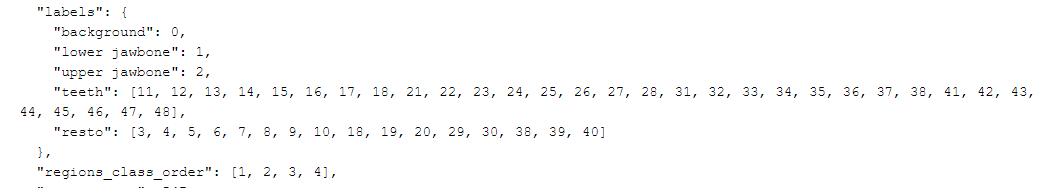